In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [2]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'

In [3]:
filename = 'Data/Sigmoid.txt'

In [4]:
data = np.loadtxt(filename, delimiter = ',', skiprows=1)
x = data[:,0]
y = data[:,1]

In [5]:
def Model(x, theta):
    return (theta[0])/(theta[1]+np.exp(-theta[2]*x))

In [6]:
def Costo(theta):
    costo = 0
    for i in range(len(x)):
        costo += (y[i]-Model(x[i],theta))**2
    return costo

In [7]:
def Derivada(t,h = 0.01):
    D = np.zeros(3)
    
    D[0] = (Costo([t[0]+h,t[1],t[2]]) - Costo([t[0]-h,t[1],t[2]]))/(2*h)
    D[1] = (Costo([t[0],t[1]+h,t[2]]) - Costo([t[0],t[1]-h,t[2]]))/(2*h)
    D[2] = (Costo([t[0],t[1],t[2]+h]) - Costo([t[0],t[1],t[2]-h]))/(2*h)
    return D
Derivada([1,1,1])

array([-110.01069727,  103.89842074,   -5.93182878])

In [8]:
def DescensoGradiente(theta,gamma,itmax,error):
    error0 = 1
    for i in range(itmax):
        if error0>error:
            funcion = Derivada(theta)
            theta = theta - gamma*funcion
    return theta

In [9]:
Descenso = DescensoGradiente([1,1,1],5e-4,10000,0.01)
costo= Costo(Descenso)
print(Descenso)
print(costo)

[4.20499414 0.93140995 2.83575276]
0.11159814982748509


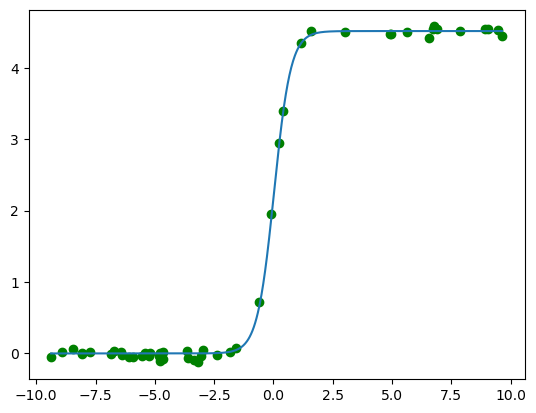

In [10]:
Z = np.linspace(min(x),max(x),1000)

plt.plot(Z,Model(Z,Descenso))
plt.scatter(x,y,color='g')